# Project 0: Inaugural

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

In [2]:
# Question 1

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [4]:
# Functions used to solve the problem

# Utility function
def u_func(c,l,v,eps):
    utility = np.log(c)-v*(l**(1+(1/eps))/(1+(1/eps)))
    return utility

# Total resources
def total_resources(m,w,l,tax0,tax1,k):
    x = m+w*l-(tax0*w*l + (tax1*np.max(w*l-k,0)))
    return x
 
 
# Print solution 
def print_solution(c,l,utility):
    print(f'c = {c:.8f}')
    print(f'l = {l:.8f}')
    print(f'u  = {utility:.8f}')

#Set parameters
m = 1
v = 10
eps = 0.3
tax0 = 0.4
tax1 = 0.1
k = 0.4
w = 0.2


#Value of choice
def value_of_choice(l,m,w,tax0,tax1,k,eps,v):
    c =  total_resources(m,w,l,tax0,tax1,k)
    return -u_func(c,l,v,eps)


# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))

# c. unpack solution
l = sol_case1.x
c = total_resources(m,w,l,tax0,tax1,k)
utility = u_func(c,l,v,eps)
print_solution(c,l,utility)

c = 1.06465125
l = 0.24651254
u  = 0.05730393


# Question 2

ADD ANSWER.

NameError: name 'f_l' is not defined

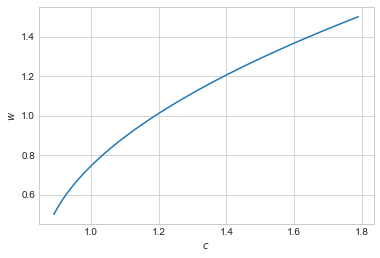

<Figure size 432x288 with 0 Axes>

In [10]:
# Values
w_vec = np.linspace(0.5,1.5,100)
l_values = np.linspace(0,1,100)
c_values_alt = total_resources(m,w_vec,l_values,tax0,tax1,k)

#Consumption plot
fig_c = plt.figure()
ax = fig_c.add_subplot(1,1,1)
ax.plot(c_values_alt,w_vec)

# a. Add labels
ax.set_xlabel('$c$')
ax.set_ylabel('$w$')

#Labor plot
fic_l = plt.figure()
ax2 = f_l.add_subplot(1,1,1)


# Question 3

ADD ANSWER.

In [4]:
# code

# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.